In [1]:
from os import path
import pandas as pd
import numpy as np
from eis.EISDataIO import eis_dataframe_from_csv, ECM_from_raw_strings
from sklearn import preprocessing

In [2]:
# Load training data

here = !pwd

train_data_path = path.join(path.dirname(here[0]), "train_data.csv")
eis_data = eis_dataframe_from_csv(train_data_path)

In [3]:
# Drop ECM parameters from df for classification exercise

#sample = eis_data.loc[eis_data.Circuit=="L-R-RCPE"]
sample = eis_data
sample

,freq,Z,Circuit,Parameters
0,"[0.1, 0.148398179, 0.220220195, 0.326802759, 0...","[(309.82561192-156.06088233j), (267.46983919-1...",L-R-RCPE-RCPE-RCPE,"L1: 2.94e-08, R1: 4.51e+00, R2: 5.19e-02, CPE1..."
1,"[1.0, 1.34339933, 1.80472177, 2.42446202, 3.25...","[(344.50700012-0.87321496j), (344.36191597-0.9...",RC-RC-RCPE-RCPE,"R1: 2.08e+02, R2: 2.50e+01, R3: 9.57e+01, R4: ..."
2,"[1.0, 1.26360956, 1.59670912, 2.01761691, 2.54...","[(3080.15920083-80.84202473j), (3071.83539583-...",L-R-RCPE-RCPE-RCPE,"L1: 3.35e-08, R1: 6.95e+01, R2: 7.49e+01, CPE1..."
3,"[10.0, 13.4990445, 18.2224203, 24.5985264, 33....","[(930.93345951-0.0068507146j), (930.93327153-0...",L-R-RCPE,"L1: 8.43e-07, R1: 9.06e+01, R2: 8.40e+02, CPE1..."
4,"[0.01, 0.0148907532, 0.0221734532, 0.033017942...","[(405.07355219-0.0149508921j), (405.07110253-0...",RCPE-RCPE-RCPE,"R1: 1.03e+01, R2: 6.71e-01, R3: 3.94e+02, CPE1..."
...,...,...,...,...
7457,"[10.0, 13.4596032, 18.1160919, 24.383541, 32.8...","[(4953.31225754-4814.61138816j), (4269.4031861...",RCPE-RCPE,"R1: 2.47e+01, R2: 2.95e+05, CPE1_t: 9.41e-01, ..."
7458,"[10.0, 12.6485522, 15.9985872, 20.2358965, 25....","[(73538.51000223-1776.24017654j), (73413.60429...",L-R-RCPE-RCPE-RCPE,"L1: 1.05e-08, R1: 2.81e+01, R2: 6.40e+01, CPE1..."
7459,"[1.0, 1.34453288, 1.80776868, 2.43060443, 3.26...","[(82.1093149-51.12982215j), (72.40330299-47.29...",RCPE-RCPE-RCPE,"R1: 4.78e+00, R2: 8.77e-01, R3: 2.85e+02, CPE1..."
7460,"[0.01, 0.0134051824, 0.0179698915, 0.024088967...","[(32.37740171-5.15196774e-05j), (32.37740063-6...",RCPE-RCPE,"R1: 5.65e+00, R2: 2.67e+01, CPE1_t: 9.21e-01, ..."


In [4]:
# Split X into Z_real and Z_imag

sample2 = sample
z_count = sample2.Z.size

sample2["Z_real"] = ""
sample2["Z_imag"] = ""

for x in range(z_count):
    
    z_real_x =  np.array(sample2.Z[x].real)
    sample2.Z_real[x] = z_real_x
    
    z_imag_x =  np.array(sample2.Z[x].imag)
    sample2.Z_imag[x] = z_imag_x

sample2 = sample2.drop(['Parameters','Z'], axis=1)
sample2 = sample2[['freq','Z_real','Z_imag','Circuit']]
sample2

,freq,Z_real,Z_imag,Circuit
0,"[0.1, 0.148398179, 0.220220195, 0.326802759, 0...","[309.82561192, 267.46983919, 229.38061493, 196...","[-156.06088233, -146.21033646, -133.4855237, -...",L-R-RCPE-RCPE-RCPE
1,"[1.0, 1.34339933, 1.80472177, 2.42446202, 3.25...","[344.50700012, 344.36191597, 344.19647198, 344...","[-0.87321496, -0.99738889, -1.13909869, -1.300...",RC-RC-RCPE-RCPE
2,"[1.0, 1.26360956, 1.59670912, 2.01761691, 2.54...","[3080.15920083, 3071.83539583, 3061.93812951, ...","[-80.84202473, -94.50641483, -110.36642266, -1...",L-R-RCPE-RCPE-RCPE
3,"[10.0, 13.4990445, 18.2224203, 24.5985264, 33....","[930.93345951, 930.93327153, 930.93302176, 930...","[-0.0068507146, -0.00910185162, -0.0120927041,...",L-R-RCPE
4,"[0.01, 0.0148907532, 0.0221734532, 0.033017942...","[405.07355219, 405.07110253, 405.06786553, 405...","[-0.0149508921, -0.0197551995, -0.026103215, -...",RCPE-RCPE-RCPE
...,...,...,...,...
7457,"[10.0, 13.4596032, 18.1160919, 24.383541, 32.8...","[4953.31225754, 4269.40318615, 3680.28615178, ...","[-4814.61138816, -4165.41666719, -3601.4380483...",RCPE-RCPE
7458,"[10.0, 12.6485522, 15.9985872, 20.2358965, 25....","[73538.51000223, 73413.60429656, 73304.9395675...","[-1776.24017654, -1592.10621049, -1461.6962630...",L-R-RCPE-RCPE-RCPE
7459,"[1.0, 1.34453288, 1.80776868, 2.43060443, 3.26...","[82.1093149, 72.40330299, 63.66501847, 55.8809...","[-51.12982215, -47.29789889, -43.31241432, -39...",RCPE-RCPE-RCPE
7460,"[0.01, 0.0134051824, 0.0179698915, 0.024088967...","[32.37740171, 32.37740063, 32.3773992, 32.3773...","[-5.15196774e-05, -6.82381469e-05, -9.03818659...",RCPE-RCPE


In [5]:
# Encode string labels to integers

le = preprocessing.LabelEncoder()
le.fit(sample2.Circuit)
print(list(le.classes_))
le.transform(sample2.Circuit)
sample2['Circuit_int']=""
Circuit_int = le.transform(sample2.Circuit)
sample2.Circuit_int = Circuit_int
sample2

['L-R-RCPE', 'L-R-RCPE-RCPE', 'L-R-RCPE-RCPE-RCPE', 'RC-G-G', 'RC-RC-RCPE-RCPE', 'RCPE-RCPE', 'RCPE-RCPE-RCPE', 'RCPE-RCPE-RCPE-RCPE', 'Rs_Ws']


,freq,Z_real,Z_imag,Circuit,Circuit_int
0,"[0.1, 0.148398179, 0.220220195, 0.326802759, 0...","[309.82561192, 267.46983919, 229.38061493, 196...","[-156.06088233, -146.21033646, -133.4855237, -...",L-R-RCPE-RCPE-RCPE,2
1,"[1.0, 1.34339933, 1.80472177, 2.42446202, 3.25...","[344.50700012, 344.36191597, 344.19647198, 344...","[-0.87321496, -0.99738889, -1.13909869, -1.300...",RC-RC-RCPE-RCPE,4
2,"[1.0, 1.26360956, 1.59670912, 2.01761691, 2.54...","[3080.15920083, 3071.83539583, 3061.93812951, ...","[-80.84202473, -94.50641483, -110.36642266, -1...",L-R-RCPE-RCPE-RCPE,2
3,"[10.0, 13.4990445, 18.2224203, 24.5985264, 33....","[930.93345951, 930.93327153, 930.93302176, 930...","[-0.0068507146, -0.00910185162, -0.0120927041,...",L-R-RCPE,0
4,"[0.01, 0.0148907532, 0.0221734532, 0.033017942...","[405.07355219, 405.07110253, 405.06786553, 405...","[-0.0149508921, -0.0197551995, -0.026103215, -...",RCPE-RCPE-RCPE,6
...,...,...,...,...,...
7457,"[10.0, 13.4596032, 18.1160919, 24.383541, 32.8...","[4953.31225754, 4269.40318615, 3680.28615178, ...","[-4814.61138816, -4165.41666719, -3601.4380483...",RCPE-RCPE,5
7458,"[10.0, 12.6485522, 15.9985872, 20.2358965, 25....","[73538.51000223, 73413.60429656, 73304.9395675...","[-1776.24017654, -1592.10621049, -1461.6962630...",L-R-RCPE-RCPE-RCPE,2
7459,"[1.0, 1.34453288, 1.80776868, 2.43060443, 3.26...","[82.1093149, 72.40330299, 63.66501847, 55.8809...","[-51.12982215, -47.29789889, -43.31241432, -39...",RCPE-RCPE-RCPE,6
7460,"[0.01, 0.0134051824, 0.0179698915, 0.024088967...","[32.37740171, 32.37740063, 32.3773992, 32.3773...","[-5.15196774e-05, -6.82381469e-05, -9.03818659...",RCPE-RCPE,5


L-R-RCPE


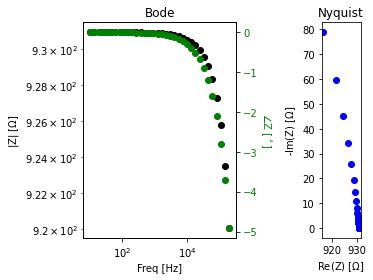

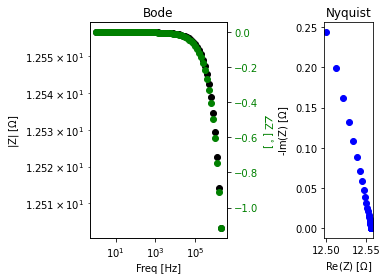

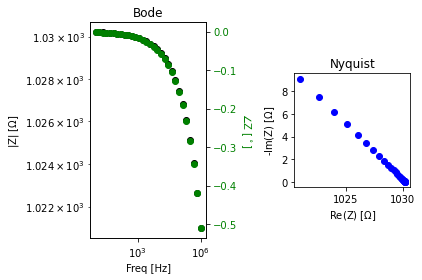

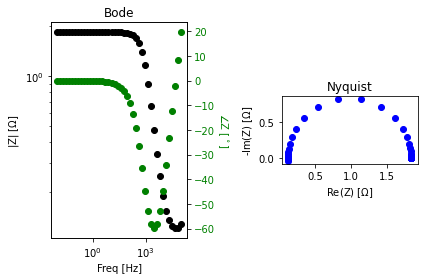

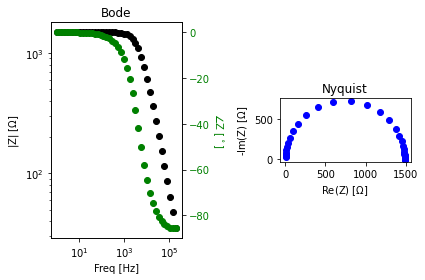

L-R-RCPE-RCPE


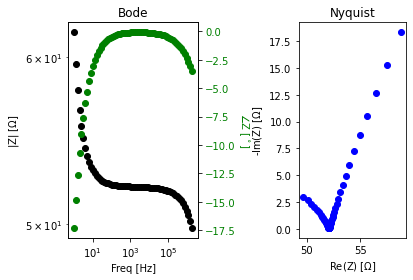

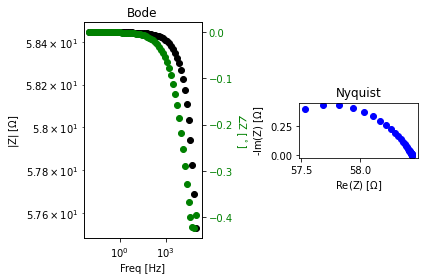

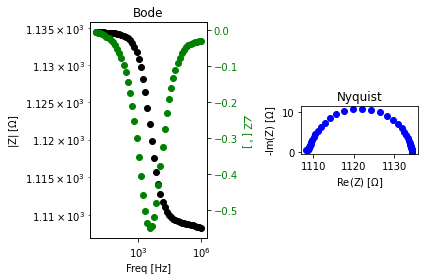

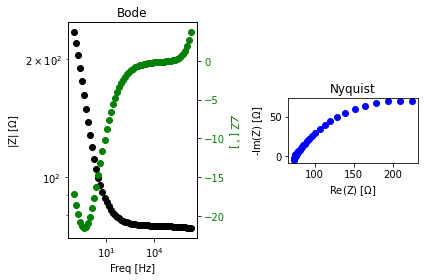

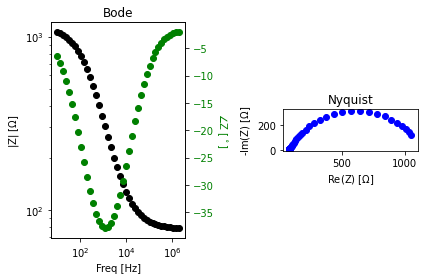

L-R-RCPE-RCPE-RCPE


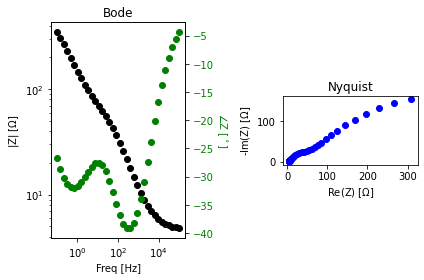

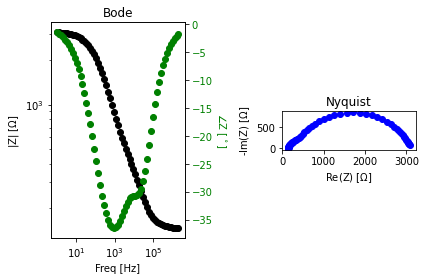

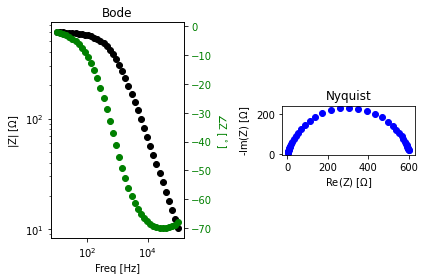

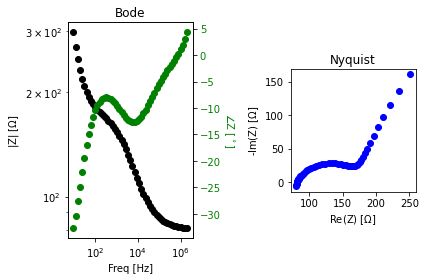

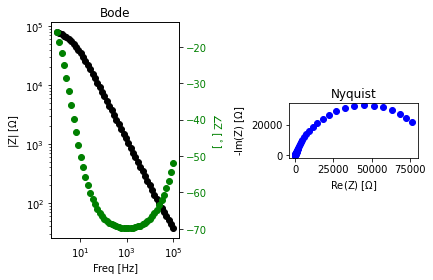

RC-G-G


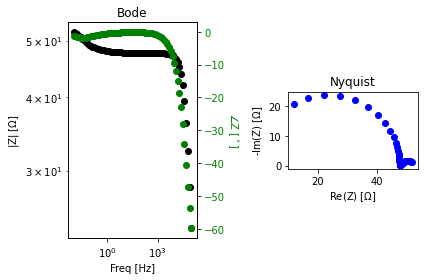

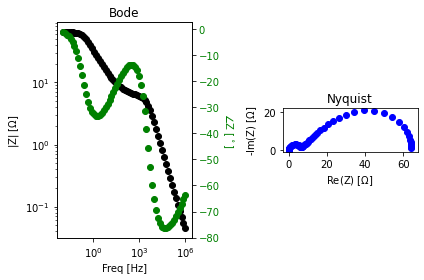

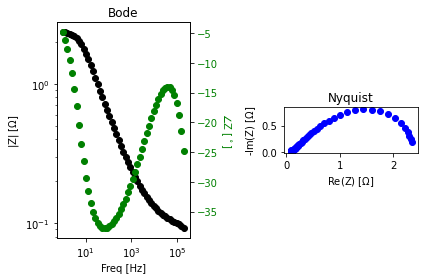

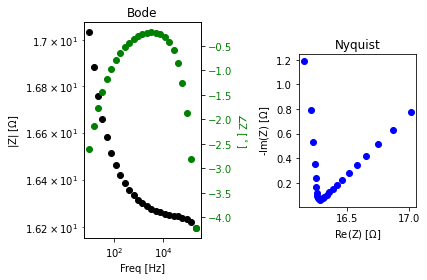

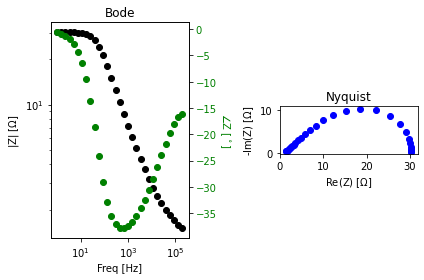

RC-RC-RCPE-RCPE


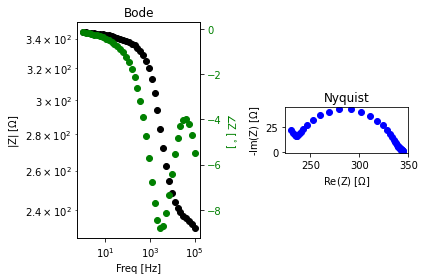

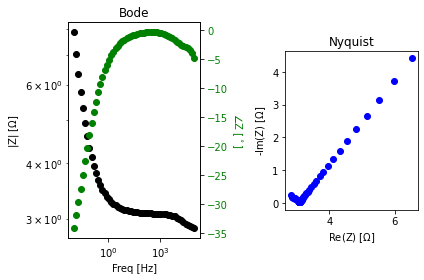

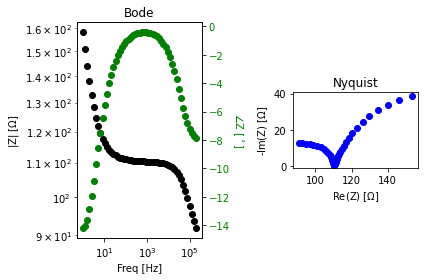

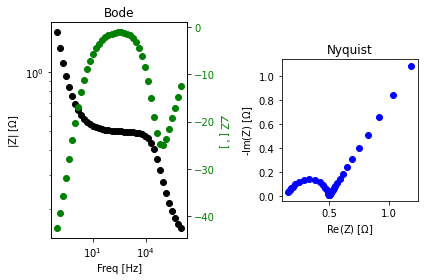

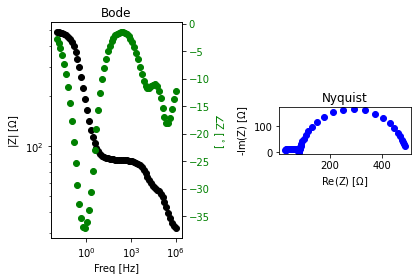

RCPE-RCPE


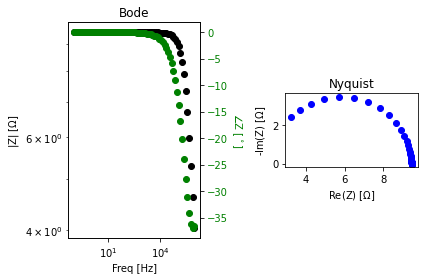

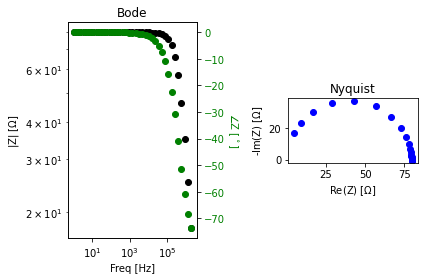

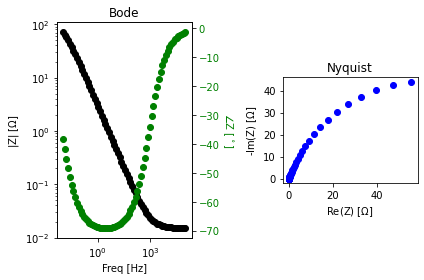

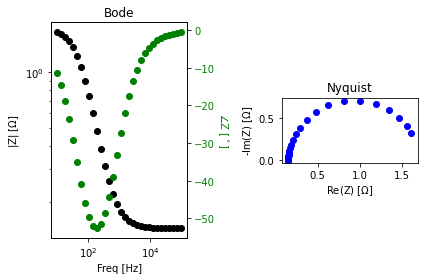

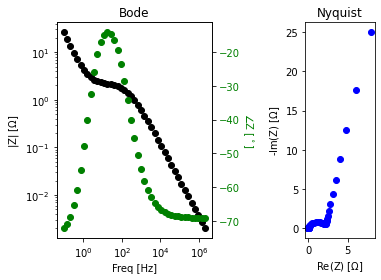

RCPE-RCPE-RCPE


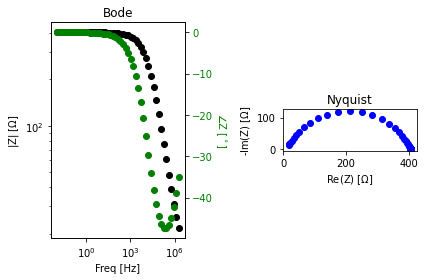

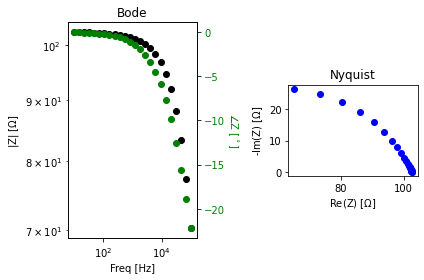

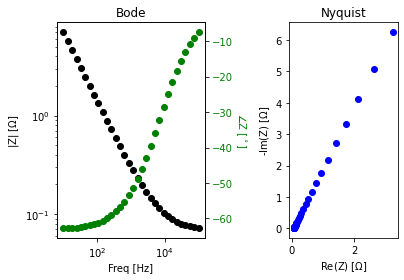

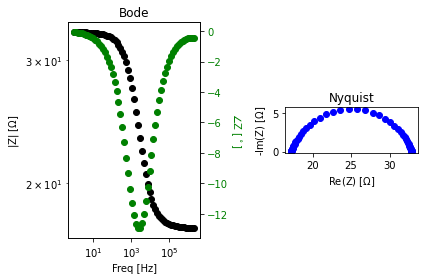

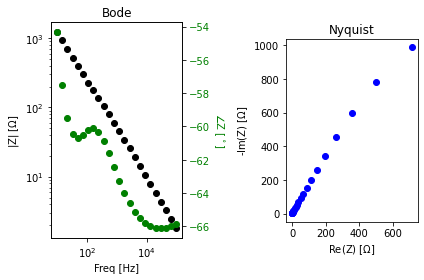

RCPE-RCPE-RCPE-RCPE


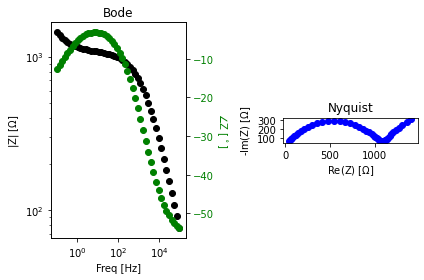

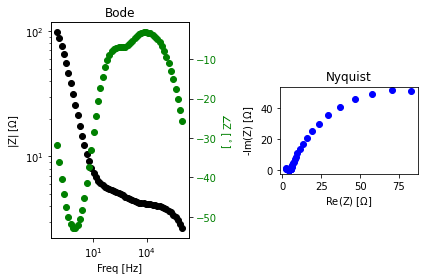

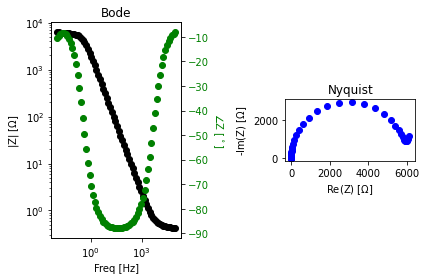

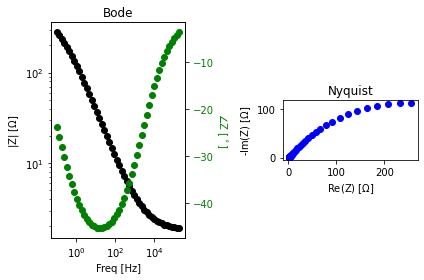

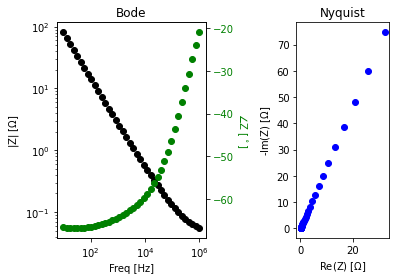

Rs_Ws


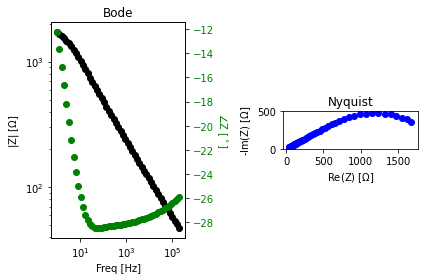

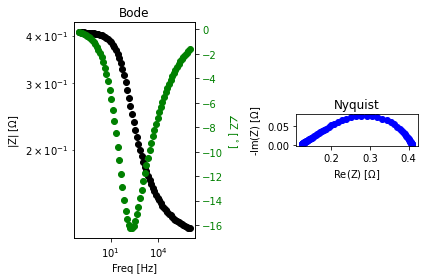

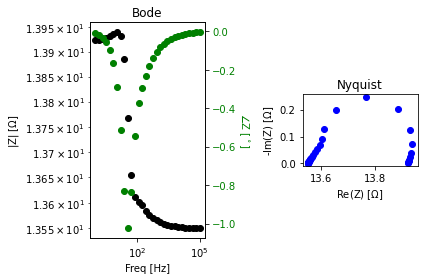

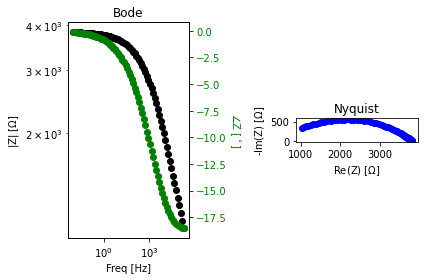

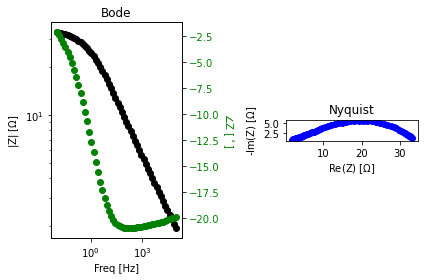

In [6]:
from eis.EISDataIO import eis_dataframe_from_csv, ECM_from_raw_strings
from eis.EISPlot import plot_eis

for x in range(len(le.classes_)):
    sample3 = eis_data.loc[eis_data.Circuit==list(le.classes_)[x]]
    print(list(le.classes_)[x])
    for y in range(5):
        sample_i = sample3.iloc[y]
        frequencies = sample_i.freq
        impedances = sample_i.Z
        plot_eis(frequencies, impedances)